# LSE Machine Learning: Practical Applications

## Module 8 Unit 1 IDE Activity (Practice)

### In this IDE activity principal component analysis is executed on the MNIST data set in R.

As you complete this activity, you are required to read the text cells throughout the notebook and then run the code in the cells that follow. Be mindful of the syntax used to execute certain functionalities within R to produce a desired result. In completing this activity, you should gain the necessary practical skills to complete the IDE Activity (Assessment) that follows.

### Step 1: Load and install the relevant R packages

For this example, the PCA package that forms part of the R core components is used. Two additional packages are needed: data.table and ggplot2.

In [1]:
library(data.table)
library(ggplot2)

To demonstrate the functionality of the packages, generate and plot a random ellipse.

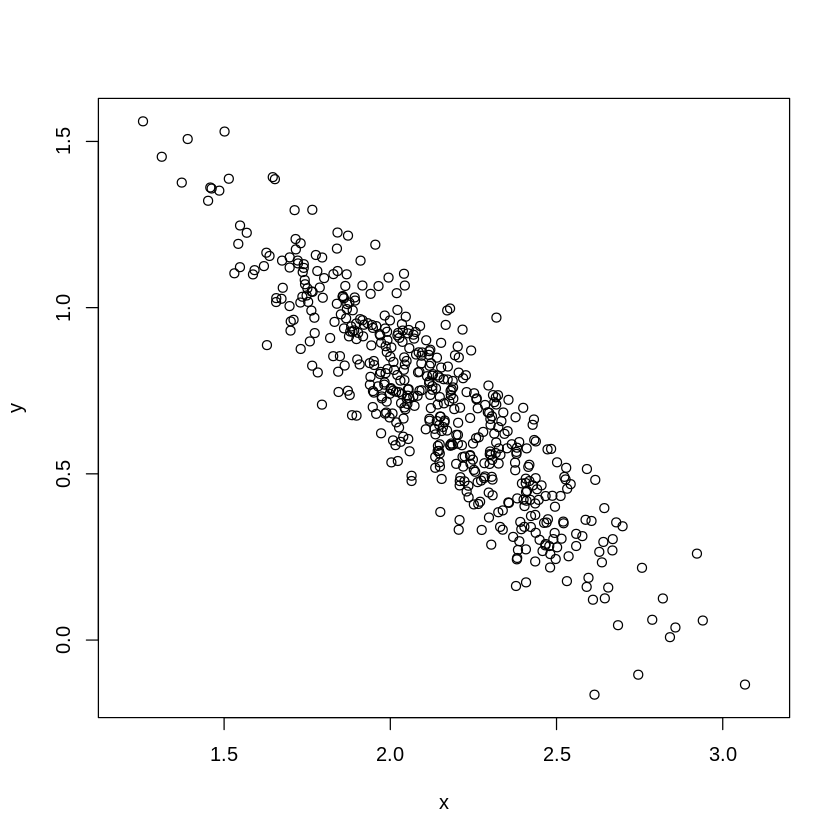

In [2]:
# Generate and plot a random ellipse.
x_coord=rnorm(500,1,0.4)
y_coord=rnorm(500,2,0.1)
direction=pi/4
DT=data.table(x=x_coord*cos(direction)+y_coord*sin(direction),
              y=-x_coord*sin(direction)+y_coord*cos(direction))

# Plot the data.
plot(DT,asp=1)

In this plot, it is observed that most observations concentrated along a line with a slope of -45 degrees. The underlying idea of PCA is to attempt to explain variance in the data set against the identified linear axis. In this activity, the aim is to identify the linear combinations where there is the most dispersion among points to create a new basis for the data space. The first components will explain the most variance, while the last will be negligent. To illustrate this, the described step is applied to the ellipse example. First obtain the first principle component, and then use the information to plot the element identified.

In [3]:
# First PCA.
PCA1 = prcomp(DT,center = T,scale. = F)

In [4]:
# Review the output.
summary(PCA1)

Importance of components:
                          PC1     PC2
Standard deviation     0.3970 0.09519
Proportion of Variance 0.9456 0.05436
Cumulative Proportion  0.9456 1.00000

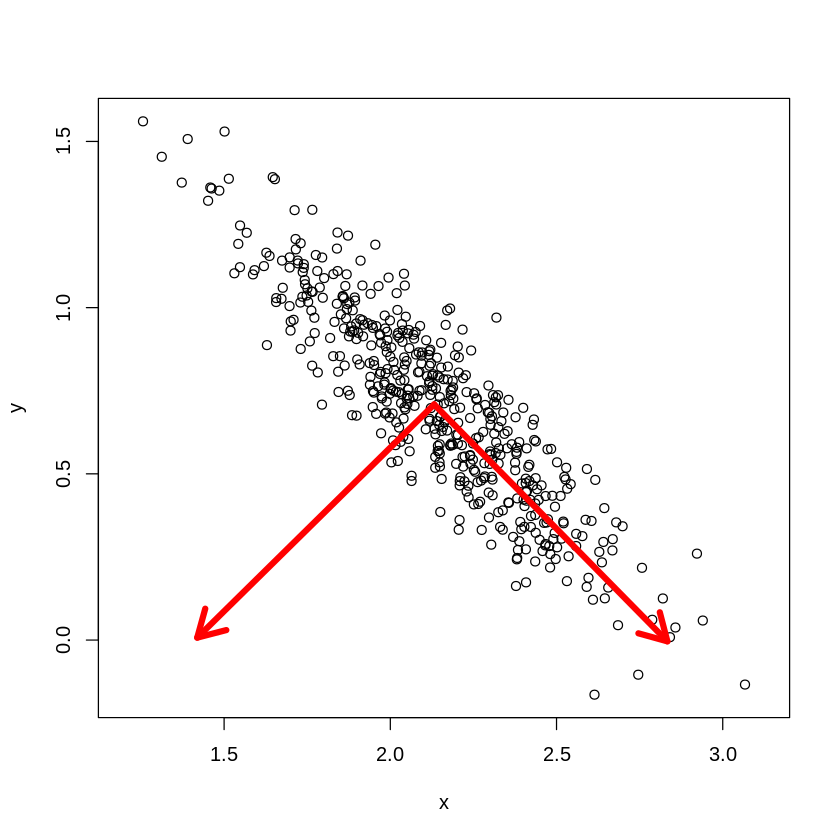

In [5]:
# Calculate the center of the data frame.
Mx=mean(DT$x)
My=mean(DT$y)

# Plot the data set.
plot(DT,asp=1)
# Plot the principle components using arrows with principal directions.
arrows(x0= c(Mx,Mx),y0= c(My,My),x1=Mx+c(PCA1$rotation[1,]),y1=My+c(PCA1$rotation[2,]),lwd=5,col="red")

The `prcomp` function is extremely useful in quickly calculating and obtaining the relevant summary statistics that is needed to perform PCA on the relevant data set. In the next section, the use of this function is demonstrated using the MNIST dataset.

### Step 2: Load the data

In this example, the MNIST data set is used to apply PCA. Recall that the MNIST data set contains handwritten digits (greyscale). In this example, the pixel density needs to be reduced in order to use the data for predictions. Note that the digits included are 0 to 9, the images are encoded in 28 x 28 matrices, and the grey intensity takes values from 0 to 255.

Firstly, load the data set into R, then plot a number of observations with their labels in order to get a better understanding of the data in question.

In [6]:
# Load the data.
mnist_data=fread('mnist.csv')

### Step 3: Apply and interpret PCA

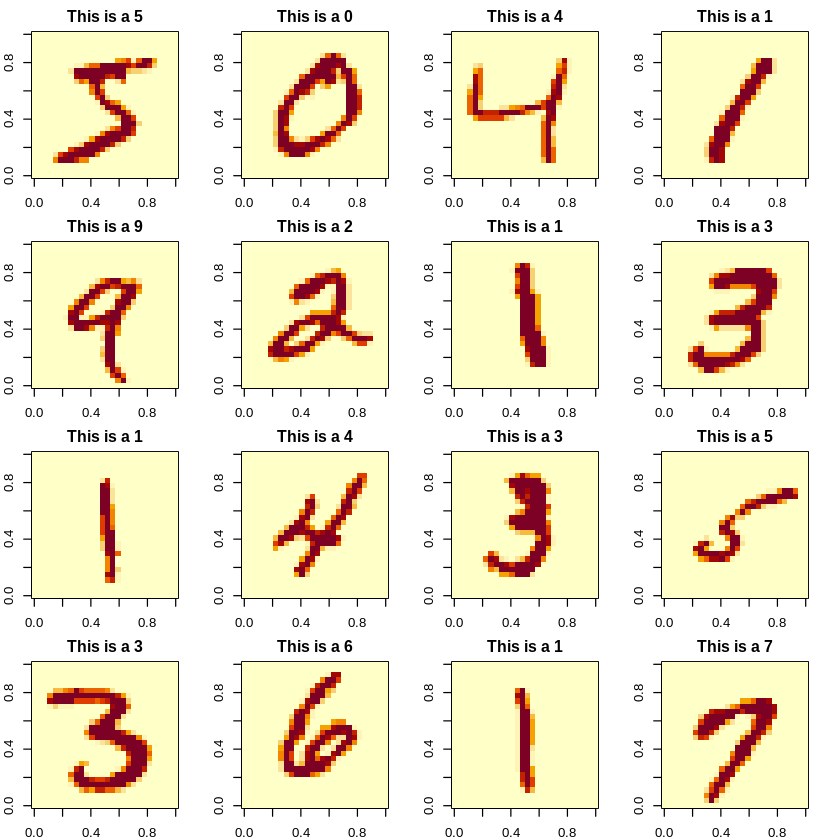

In [7]:
# Plot observations.
par(mfrow=c(4,4),mar=c(2,2,2,2))
for (i in 1:16)
{
    ## Changing i-th row to matrix.
    mat=matrix(as.numeric(mnist_data[i,785:2,with=F]),nrow = 28,ncol=28,byrow = F)
    
    ## Inverting row order.
    mat=mat[nrow(mat):1,]
    
    ## Plot.
    image(mat,main=paste0('This is a ',mnist_data[i,1,with=F]))
}

While these are relatively easy to recognise visually, from a programmatic perspective it is more difficult to achieve reliably. In this example, PCA is used to only retain the combinations of pixels that add information to the data set. While the pixels mainly represent the numbers, there are other elements that need to be cleaned in preprocessing. The first step would be to remove constant pixels, as these would not be used and would interfere with scaling. In the example below, the removal of the border (which contains constant pixels) is demonstrated. 

In [8]:
# Identify the constant pixels.

# You would typically experiment with this code in your analysis phase, # but would remove the output, as it serves as input for the preprocessing in the next cell.

# This is not executed as it produces text output. 
# which(mnist_data[,sapply(.SD,FUN = function(x){min(x)==max(x)}),.SDcols=2:ncol(mnist_data)])

In [9]:
# Pre-processing: removes cells closer than three cells from the border.
mnist_data=mnist_data[,-(which((1:784)%%28<=3|(1:784)%%28>=25|1:784%/%28<=3|1:784%/%28>=25)+1),with=F]

The data is now ready to be used for PCA. Build the model using the `prcomp` function. Briefly review the output of this model, using the `str` and `summary` functions. 

_**Note:**_ The output generated by the following code cells may take a few seconds to run.

In [10]:
# Create a training set and reduce using PCA.
PCA1=prcomp(mnist_data[,(2:ncol(mnist_data)),with=F],
            center = T, scale. = F)

In [11]:
summary(PCA1)

Importance of components:
                             PC1      PC2       PC3       PC4       PC5
Standard deviation     576.27518 489.9450 458.42898 425.86849 407.77838
Proportion of Variance   0.09933   0.0718   0.06286   0.05425   0.04974
Cumulative Proportion    0.09933   0.1711   0.23399   0.28824   0.33797
                             PC6       PC7       PC8       PC9      PC10
Standard deviation     382.89929 333.34997 313.86737 306.96679 282.02550
Proportion of Variance   0.04385   0.03324   0.02947   0.02818   0.02379
Cumulative Proportion    0.38183   0.41506   0.44453   0.47271   0.49650
                            PC11      PC12      PC13      PC14     PC15
Standard deviation     268.31240 262.14702 242.02126 240.14789 231.9890
Proportion of Variance   0.02153   0.02055   0.01752   0.01725   0.0161
Cumulative Proportion    0.51804   0.53859   0.55611   0.57336   0.5895
                            PC16      PC17      PC18      PC19      PC20
Standard deviation     224.63019 

In order to obtain a better understanding of the impact of the variance identified in the output of the previous code cell, plot their impact cumulatively using the `plot(cumsum)` function.

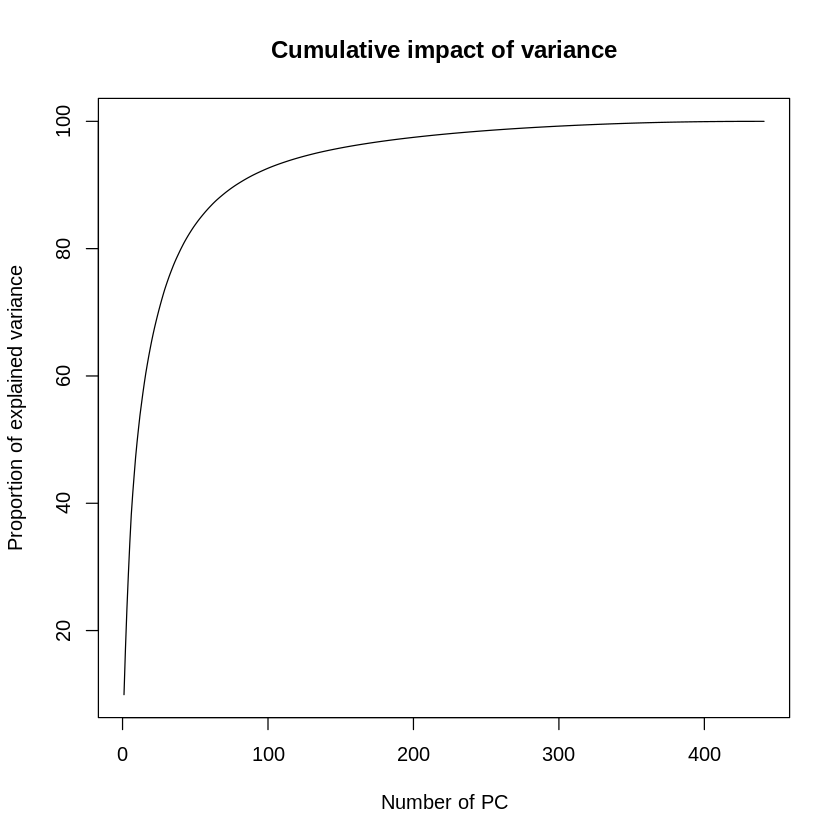

In [12]:
# Plot cumulative impact of variance.
plot(cumsum(PCA1$sdev^2)/sum(PCA1$sdev^2)*100, type="l",
     main='Cumulative impact of variance',xlab="Number of PC", ylab="Proportion of explained variance")

The majority of variance can be explained with about 100 main directions. The remainder accounts for a comparatively small amount of variance, which decreases drastically as the number of directions increase beyond 200.

### Step 4: Plot

Create a projected table that contains all the factors created by the model. This in turn will be used to plot the impact of retaining different numbers of axes in the data for visual explanation of the method. To demonstrate the impact, plot 16 observations using 2,10, and 40 dimensions.

In [13]:
# Project the reduced components on the original data.
projected=scale(mnist_data[,(2:ncol(mnist_data)),with=F], PCA1$center, PCA1$scale) %*% PCA1$rotation

# Review the summary.
projectedsummary <- projected[seq(0,100,5),]
projectedsummary

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,⋯,PC432,PC433,PC434,PC435,PC436,PC437,PC438,PC439,PC440,PC441
-373.36957,716.92660,18.33881,280.66742,-77.92730,63.12161,-70.217227,414.722727,224.63018,-55.70803,⋯,0.16873607,0.53330943,0.29884908,0.21235223,0.066736596,0.02709046,0.0594030415,-0.2135367425,0.08026359,0.0316278501
-303.09930,501.67135,675.79390,-85.93892,-40.06716,-31.60907,-439.874160,-60.926601,-23.79312,494.85356,⋯,0.65971670,-0.41786933,0.40494899,0.13283320,0.486064143,0.26538847,0.0152562436,-0.1471753178,-0.04410313,-0.0623953533
-867.69590,-215.38446,-97.66615,-132.56697,489.33655,-321.99377,190.276443,312.033847,-199.56478,19.93378,⋯,0.11916368,-0.10282152,0.20192476,-0.23112710,0.161787667,-0.09893387,0.0111348320,-0.0595660181,-0.05702068,-0.0001310795
-779.79614,72.18117,289.89239,370.58994,167.37292,113.78890,115.383295,19.215842,183.42185,386.69961,⋯,0.23023798,0.05805520,-0.45617110,-0.16571044,0.018759227,0.10920240,-0.1521982058,-0.0514516842,-0.18726190,0.0553510402
-276.31115,-270.93173,291.04134,-105.96935,228.21110,-271.81927,341.887118,-233.859311,170.72172,-191.95771,⋯,0.26183669,-0.12163694,-0.34766444,-0.21434272,-0.086663583,-0.07734130,-0.2129997823,-0.1595237086,-0.02439738,0.1154605817
-651.14996,150.85429,329.35333,-268.54898,76.07786,266.06345,-137.607209,-87.191279,112.49934,340.99272,⋯,0.24578559,0.06950418,0.13015204,-0.54244160,-0.602532286,-0.20584692,-0.0142100817,0.2384640669,-0.20424771,-0.0332868384
611.24987,-245.30308,699.19240,678.81841,-324.08829,-394.77218,4.673322,-499.020684,128.20597,-51.67242,⋯,0.04163107,0.38670640,0.49644128,-0.27805810,-0.189792524,-0.31852242,-0.0296064111,-0.0430698851,0.01609547,0.0527239111
246.21835,319.83516,415.52351,-220.03036,-397.81642,-880.04548,450.734741,59.462900,-433.66049,293.75565,⋯,-0.03221608,-0.05389614,-0.14921054,-0.07036022,-0.036266068,-0.01743875,-0.2239769962,-0.0731633797,0.06324482,-0.0995884611
-483.06964,-54.17617,-773.66798,-60.36427,148.86512,-176.06428,-94.601748,-84.803831,113.29383,-526.23228,⋯,-0.39664378,-0.05297740,0.72935422,-0.56695930,-0.114640761,0.13225044,0.1668724206,-0.5218955473,-0.21715769,-0.0168754054
269.50115,-787.72951,-146.16444,1085.49055,-99.95105,22.05614,-54.502559,-379.240286,-100.54126,-261.02401,⋯,9.32501849,0.35042703,-0.22490956,18.21572092,-3.516167872,-0.22824769,0.7462426216,0.0305058703,-0.72747385,0.0435472573


To demonstrate the impact of the reduction, we can visually review the impact of retaining different numbers of dimensions.

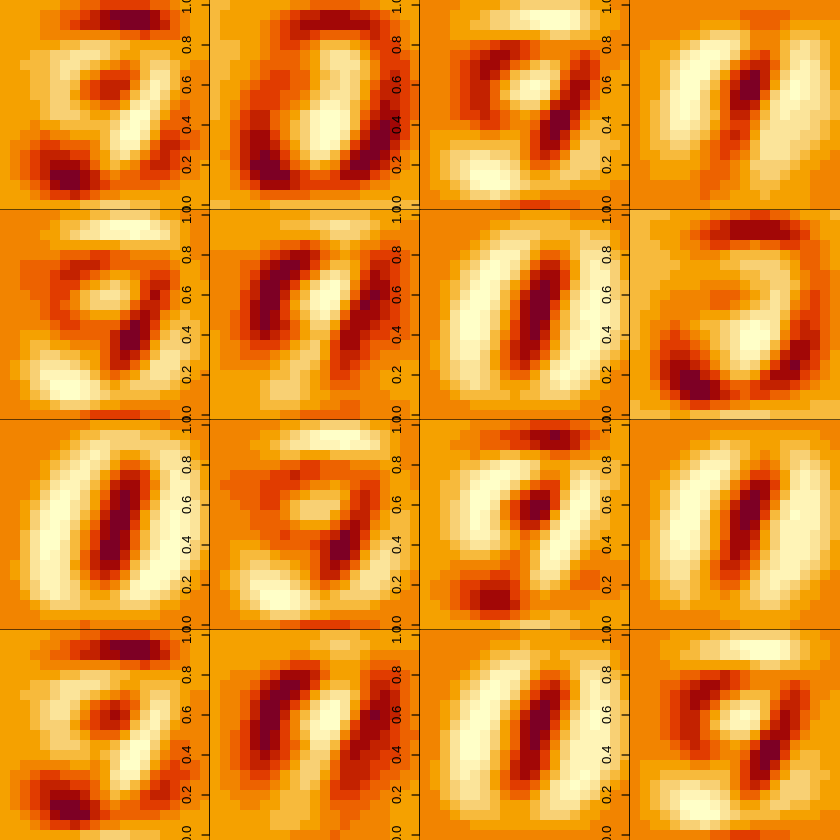

In [14]:
# Keep 2 main dimensions.
n_dim=2

# Project data using a specified number of principal components.
coord_x=data.table(mnist_data$label,projected[,1:n_dim]%*%t(PCA1$rotation)[1:n_dim,])

# Plot.
par(mfrow=c(4,4),mar=c(0,0,0,0))
for (i in 1:16)
{
    mat=matrix(as.numeric(coord_x[i,441:1,with=F]),
               nrow = 21,
               ncol=21,
               byrow = F)
    mat=mat[nrow(mat):1,]
    image(mat)
}

There is a significant reduction in the input data, but also losing a significant amount of information by only retaining two principle components or dimensions. In the next step, eight dimensions are added to illustrate the first 16 observations using ten principal components.

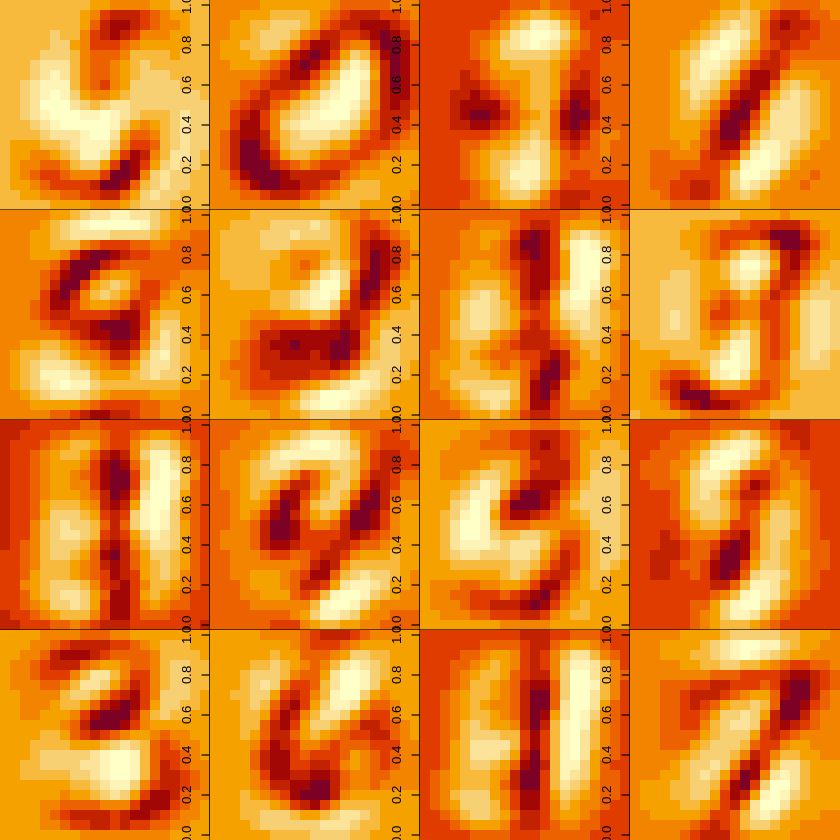

In [15]:
# Keep 10 main dimensions.
n_dim=10

# Project data using a specified number of principal components.
coord_x=data.table(mnist_data$label,projected[,1:n_dim]%*%t(PCA1$rotation)[1:n_dim,])

# Plot.
par(mfrow=c(4,4),mar=c(0,0,0,0))
for (i in 1:16)
{
    mat=matrix(as.numeric(coord_x[i,441:1,with=F]),
               nrow = 21,
               ncol=21,
               byrow = F)
    mat=mat[nrow(mat):1,]
    image(mat)
}

Although this output is slightly more clear than the previous output using only three principal components, the output could still be clearer than it currently is. To increase clarity, add 40 dimensions and plot the first 16 observations.

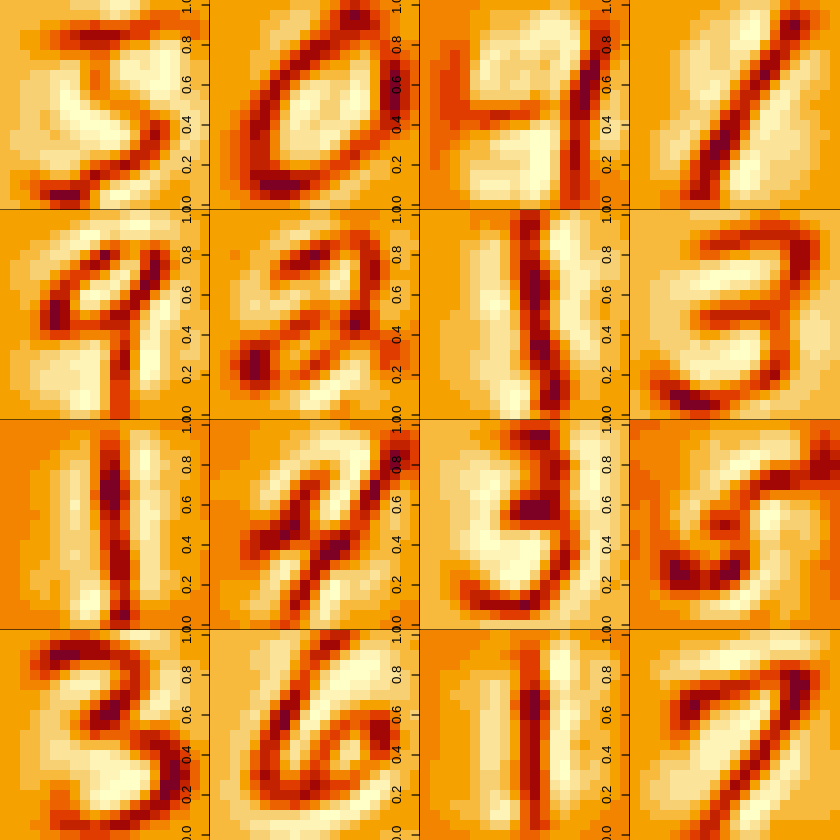

In [16]:
# Keep 40 main dimensions.
n_dim=40

# Project data using a specified number of principal components.
coord_x=data.table(mnist_data$label,projected[,1:n_dim]%*%t(PCA1$rotation)[1:n_dim,])

# Plot.
par(mfrow=c(4,4),mar=c(0,0,0,0))
for (i in 1:16)
{
    mat=matrix(as.numeric(coord_x[i,441:1,with=F]),
               nrow = 21,
               ncol=21,
               byrow = F)
    mat=mat[nrow(mat):1,]
    image(mat)
}

Note how the characters becomes increasingly clear as more dimensions are introduced. Simply using the first dimension drastically reduces the information that is available to make inferences from, so it is worthwhile spending more time to find the optimal balance for a particular need when deciding on the number of dimensions to retain. In this case, 40 components, which preserve around 80% of the total variance, seems a decent option, though the final choice would depend on what the prepared data will be used for.